In [1]:
import pandas as pd   # pip install pandas

df = pd.read_excel(r'C:\Users\happy\Desktop\МИФИ\Матстат\Лабы\БДЗдата\data_matstat_K5.xls', sheet_name='A - aaup')
print(df)

         A1                            A2  A3   A4   A5   A6   A7   A8 A9  \
0      1061     Alaska Pacific University  AK  IIB  454  382  362  382  N   
1      1063         Univ.Alaska-Fairbanks  AK    I  686  560  432  508  Y   
2      1065         Univ.Alaska-Southeast  AK  IIA  533  494  329  415  N   
3     11462         Univ.Alaska-Anchorage  AK  IIA  612  507  414  498  Y   
4      1002     Alabama Agri.&Mech. Univ.  AL  IIA  442  369  310  350  N   
5      1004      University of Montevallo  AL  IIA  441  385  310  388  N   
6      1008          Athens State College  AL  IIB  466  394  351  396  N   
7      1009       Auburn University- Main  AL    I  580  437  374  455  Y   
8      1012   Birmingham Southern College  AL  IIB  498  379  322  401  N   
9      1016        Univ. of North Alabama  AL  IIB  506  412  359  411  N   
10     1019            Huntingdon College  AL  IIB  339  303  287  301  N   
11     1020      Jacksonville State Univ.  AL  IIA  461  389  338  386  N   

In [2]:
max(df['A7'])

576

In [3]:
# 1. Описательные статистики

In [4]:
# 1.1. Выборочные характеристики

In [5]:
from scipy import stats
from scipy.stats import norm
import numpy as np

In [6]:
print("Выборка 1:  Среднее {}, Оценка дисперсии {}, с.к.о {}, Коэффициент ассиметрии {}, Эксцесс {}".format(np.mean(df['A6']),np.var(df['A6']),np.std(df['A6']),stats.skew(df['A6']),stats.kurtosis(df['A6'])))
print("Выборка 2:  Среднее {}, Оценка дисперсии {}, с.к.о {}, Коэффициент ассиметрии {}, Эксцесс {}".format(np.mean(df['A7']),np.var(df['A7']),np.std(df['A7']),stats.skew(df['A7']),stats.kurtosis(df['A7'])))
print("Выборка 3:  Среднее {}, Оценка дисперсии {}, с.к.о {}, Коэффициент ассиметрии {}, Эксцесс {}".format(np.mean(df['A8']),np.var(df['A8']),np.std(df['A8']),stats.skew(df['A8']),stats.kurtosis(df['A8'])))

Выборка 1:  Среднее 420.04193849021436, Оценка дисперсии 4953.143627929115, с.к.о 70.37857364233176, Коэффициент ассиметрии 0.3481481718850067, Эксцесс 0.17581685259992685
Выборка 2:  Среднее 355.08853681267476, Оценка дисперсии 2901.5830279615984, с.к.о 53.86634411171412, Коэффициент ассиметрии 0.44737126211025235, Эксцесс 0.4319131904766307
Выборка 3:  Среднее 428.0326188257223, Оценка дисперсии 8209.962589320685, с.к.о 90.60884388027851, Коэффициент ассиметрии 0.8191411695756438, Эксцесс 0.9757478446505425


In [7]:
# 1.2. Группировка и гистограммы частот

In [8]:
alpha = [0.01, 0.05, 0.1]
def freq(x, local_begin, local_end):
    return len(list(filter(lambda t: t >= local_begin and t < local_end, list(x))))

def print_4_1(first):
    np_first = np.array(df[first])
    begin = min(np_first)
    end = max(np_first) 
    std = np.std(np_first)
    mean = np.mean(np_first)
    n = len(np_first)
    k = int(1 + 1.3*np.log(len(np_first)))
    h =  (end - begin)/ k
    print("Число групп {}, Ширина интервалов {}".format(k,h))
    rows = []
    bins = []
    for i in range(1, k + 1):
        local_begin = begin + (i-1)*h
        bins.append(local_begin)
        local_end   = begin + i*h
        probability = stats.norm.cdf((local_end - mean) / std) - stats.norm.cdf((local_begin - mean) / std)
        freq = len(list(filter(lambda t: t >= local_begin and t <= local_end, list(np_first))))
        rows.append([i, round(local_begin, 4), round(local_end, 4), freq, round(freq/n, 4), round(probability, 4)])
    bins.append(local_end)
    print(rows)
    return bins
bins = print_4_1('A6')

Число групп 10, Ширина интервалов 49.9
[[1, 234.0, 283.9, 17, 0.0158, 0.0224], [2, 283.9, 333.8, 97, 0.0904, 0.0837], [3, 333.8, 383.7, 222, 0.2069, 0.1926], [4, 383.7, 433.6, 324, 0.302, 0.2736], [5, 433.6, 483.5, 220, 0.205, 0.24], [6, 483.5, 533.4, 119, 0.1109, 0.13], [7, 533.4, 583.3, 60, 0.0559, 0.0434], [8, 583.3, 633.2, 10, 0.0093, 0.009], [9, 633.2, 683.1, 3, 0.0028, 0.0011], [10, 683.1, 733.0, 1, 0.0009, 0.0001]]


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

[ 17.  97. 222. 324. 220. 119.  60.  10.   3.   1.]


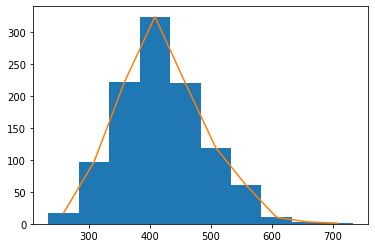

In [10]:
fig, ax = plt.subplots()

# гистограмма
n, bins, patches = ax.hist(df['A6'], 10)
print(n)
poligon = []
for i in range(len(bins)-1):
    poligon.append((bins[i+1] + bins[i])/2)
ax.plot(poligon, n)

[3.17503600e-04 1.81163819e-03 4.14622348e-03 6.05124508e-03
 4.10887012e-03 2.22252520e-03 1.12060094e-03 1.86766823e-04
 5.60300470e-05 1.86766823e-05]
1.0


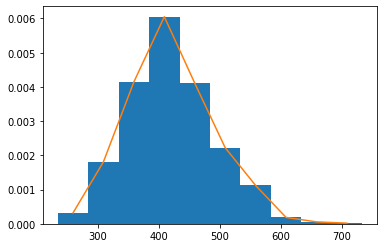

In [11]:
fig, ax = plt.subplots()

# гистограмма
n, bins, patches = ax.hist(df['A6'], 10, density=True)
poligon = []
for i in range(len(bins)-1):
    poligon.append((bins[i+1] + bins[i])/2)
ax.plot(poligon, n)
print(n)
sum0 = 0
for i in range(len(n)):
    sum0 += n[i]*49.9
print(sum0)

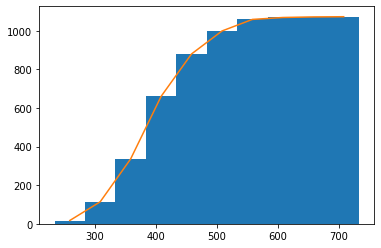

In [12]:
fig, ax = plt.subplots()

# гистограмма
n, bins, patches = ax.hist(df['A6'], 10, cumulative=True)
poligon = []
for i in range(len(bins)-1):
    poligon.append((bins[i+1] + bins[i])/2)
ax.plot(poligon, n)

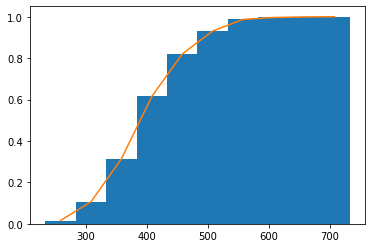

In [13]:
fig, ax = plt.subplots()

# гистограмма
n, bins, patches = ax.hist(df['A6'], 10, density=True, cumulative=True)
poligon = []
for i in range(len(bins)-1):
    poligon.append((bins[i+1] + bins[i])/2)
ax.plot(poligon, n)

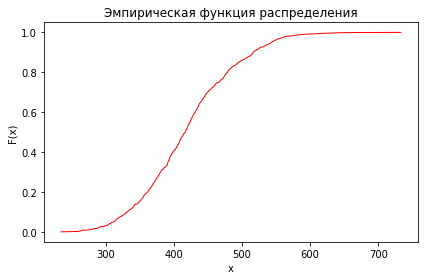

In [14]:
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
ecdf1 = ECDF(df['A6'])
ecdf1(df['A6'])
fig, ax = plt.subplots()
ax.plot(sorted(df['A6']),sorted(ecdf1(df['A6'])), lw = 1, color = 'r', alpha = 1)
ax.set_title("Эмпирическая функция распределения")
ax.set_xlabel("x")
ax.set_ylabel("F(x)")
fig.tight_layout()
plt.show()

In [15]:
# 2. Интервальные оценки

In [16]:
# 2.1. Доверительные интервалы для мат. ожидания

In [17]:
def dov_interval_m_without_D(alpha, vib):
    lower_bound = np.mean(vib) - (np.std(vib, ddof=1) * stats.t.ppf(1-alpha/2, len(vib)-1))/(np.power(len(vib), 1/2))
    upper_bound = np.mean(vib) + (np.std(vib, ddof=1) * stats.t.ppf(1-alpha/2, len(vib)-1))/(np.power(len(vib), 1/2))
    return lower_bound, upper_bound 

In [18]:
print(dov_interval_m_without_D(0.01, df['A6']))
print(dov_interval_m_without_D(0.05, df['A6']))
print(dov_interval_m_without_D(0.1, df['A6']))

(414.49524677665914, 425.5886302037696)
(415.82417934151255, 424.2596976389162)
(416.50322182330416, 423.58065515712457)


In [19]:
# 2.2. Доверительные интервалы для дисперсии

In [20]:
def dov_interval_D_without_m(alpha, vib):
    lower_bound = ((len(vib) - 1) * np.power(np.std(vib, ddof=1), 2))/(stats.chi2.ppf(1-alpha/2, len(vib)-1))
    upper_bound = ((len(vib) - 1) * np.power(np.std(vib, ddof=1), 2))/(stats.chi2.ppf(alpha/2, len(vib)-1))
    return lower_bound, upper_bound 

In [21]:
print(dov_interval_D_without_m(0.01, df['A6']))
print(dov_interval_D_without_m(0.05, df['A6']))
print(dov_interval_D_without_m(0.1, df['A6']))

(4447.380960380972, 5556.4941288958635)
(4563.435210857338, 5405.777996181661)
(4624.384798423496, 5330.759994544361)


In [22]:
# 2.3. Доверительные интервалы для разности мат. ожиданий

In [23]:
def dov_interval_m1_minus_m2(alpha, vib1, vib2):
    n1 = len(vib1)
    n2 = len(vib2)
    X1 = np.mean(vib1)
    X2 = np.mean(vib2)
    S1 = np.std(vib1)
    S2 = np.std(vib2)
    k = (np.power((S1**2/n1)+(S2**2/n2), 2))/((((S1**2/n1)**2)/(n1-1)) + (((S2**2/n2)**2)/(n2-1)))
    lower_bound = (X1 - X2) - (np.power((S1**2/n1)+(S2**2/n2), 1/2)) * (stats.t.ppf(1-alpha/2, k)) 
    upper_bound = (X1 - X2) + (np.power((S1**2/n1)+(S2**2/n2), 1/2)) * (stats.t.ppf(1-alpha/2, k)) 
    return lower_bound, upper_bound 

In [24]:
print(dov_interval_m1_minus_m2(0.01, df['A6'], df['A7']))
print(dov_interval_m1_minus_m2(0.05, df['A6'], df['A7']))
print(dov_interval_m1_minus_m2(0.1, df['A6'], df['A7']))

(57.97757080793266, 71.92923254714654)
(59.6472978375815, 70.2595055174977)
(60.50100927095243, 69.40579408412678)


In [25]:
# 2.4. Доверительные интервалы для отношения дисперсий

In [26]:
def dov_interval_otnoshenie_D(alpha, vib1, vib2):
    lower_bound = (np.power(np.std(vib1, ddof=1), 2)/np.power(np.std(vib2, ddof=1), 2)) * stats.f.ppf(alpha, len(vib2)-1, len(vib1)-1)
    upper_bound = (np.power(np.std(vib1, ddof=1), 2)/np.power(np.std(vib2, ddof=1), 2)) * stats.f.ppf(1-alpha/2, len(vib2)-1, len(vib1)-1)
    return lower_bound, upper_bound 

In [27]:
print(dov_interval_otnoshenie_D(0.01, df['A6'], df['A7']))
print(dov_interval_otnoshenie_D(0.05, df['A6'], df['A7']))
print(dov_interval_otnoshenie_D(0.1, df['A6'], df['A7']))

(1.480779614071244, 1.9981619064706366)
(1.5437985760762851, 1.9242832156651444)
(1.5784676144464402, 1.8875618993974836)


In [28]:
# 3. Проверка статистических гипотез о математических ожиданиях и дисперсиях

In [29]:
# 3.1. Проверка статистических гипотез о математических ожиданиях

In [30]:
def t_test_Z(vib, m0):
    return (np.mean(vib) - m0) * np.sqrt(len(vib)) / np.std(vib,ddof=1)

print("1. выбор-е зн-е: {} ".format(t_test_Z(df['A6'], m0=420)))
print("2. выбор-е зн-е: {} ".format(t_test_Z(df['A6'], m0=415)))
print("3. выбор-е зн-е: {} ".format(t_test_Z(df['A6'], m0=430)))
print("1. p = {}".format(2*min(stats.t.cdf(t_test_Z(df['A6'], m0=420), len(df['A6'])), 1-stats.t.cdf(t_test_Z(df['A6'], m0=420), len(df['A6'])))))
print("2. p = {}".format(2*min(stats.t.cdf(t_test_Z(df['A6'], m0=414), len(df['A6'])), 1-stats.t.cdf(t_test_Z(df['A6'], m0=414), len(df['A6'])))))
print("3. p = {}".format(2*min(stats.t.cdf(t_test_Z(df['A6'], m0=430), len(df['A6'])), 1-stats.t.cdf(t_test_Z(df['A6'], m0=430), len(df['A6'])))))


1. выбор-е зн-е: 0.019510559498910084 
2. выбор-е зн-е: 2.3456028197572425 
3. выбор-е зн-е: -4.632673961017755 
1. p = 0.9844374406731771
2. p = 0.005031432810853831
3. p = 4.052250802075712e-06


In [31]:
# 3.2. Проверка статистических гипотез о дисперсиях

In [32]:
def chi2_test_wo_m_Z(vib, sigma):
    sum0 = 0
    for i in vib:
        sum0 += np.power((i-np.mean(vib)), 2)
    s0 = sum0/(len(vib)-1)
    return (len(vib)-1)*s0/np.power(sigma, 2)

print("1. выбор-е зн-е: {} ".format(chi2_test_wo_m_Z(df['A6'], sigma=70)))
print("2. выбор-е зн-е: {} ".format(chi2_test_wo_m_Z(df['A6'], sigma=66)))
print("3. выбор-е зн-е: {} ".format(chi2_test_wo_m_Z(df['A6'], sigma=80)))
print("1. p = {}".format(2*min(stats.chi2.cdf(chi2_test_wo_m_Z(df['A6'], sigma=70), len(df['A6'])-1), 1-stats.chi2.cdf(chi2_test_wo_m_Z(df['A6'], sigma=70), len(df['A6'])-1))))
print("2. p = {}".format(2*min(stats.chi2.cdf(chi2_test_wo_m_Z(df['A6'], sigma=66), len(df['A6'])-1), 1-stats.chi2.cdf(chi2_test_wo_m_Z(df['A6'], sigma=66), len(df['A6'])-1))))
print("4. p = {}".format(2*min(stats.chi2.cdf(chi2_test_wo_m_Z(df['A6'], sigma=80), len(df['A6'])-1), 1-stats.chi2.cdf(chi2_test_wo_m_Z(df['A6'], sigma=80), len(df['A6'])-1))))

1. выбор-е зн-е: 1084.637369952641 
2. выбор-е зн-е: 1220.0925419577457 
3. выбор-е зн-е: 830.4254863699907 
1. p = 0.7746906092181141
2. p = 0.002097208314739696
4. p = 1.552116959315864e-08


In [33]:
# 3.3. Проверка статистических гипотез о равенстве математических ожиданий

In [34]:
def t_test_m1_equal_m2(vib1, vib2):
    n1 = len(vib1)
    n2 = len(vib2)
    X1 = np.mean(vib1)
    X2 = np.mean(vib2)
    S1 = np.std(vib1)
    S2 = np.std(vib2)
    k = (np.power((S1**2/n1)+(S2**2/n2), 2))/((((S1**2/n1)**2)/(n1-1)) + (((S2**2/n2)**2)/(n2-1)))
    statistic = (X1-X2)/(np.power((S1**2/n1)+(S2**2/n2), 1/2))
    p_value = 2*min(1 - stats.t.cdf(statistic, k), stats.t.cdf(statistic, k))
    return statistic, p_value

In [35]:
t_test_m1_equal_m2(df['A6'],df['A7'])

(24.006907733804898, 0.0)

In [36]:
# 3.4. Проверка статистических гипотез о равенстве дисперсий

In [37]:
def two_smpl_f_test_wo_m_Z(smpl1, smpl2):
    sum01 = 0
    sum02 = 0
    for i in smpl1:
        sum01 += np.power((i-np.mean(smpl1)), 2)
    for i in smpl2:
        sum02 += np.power((i-np.mean(smpl2)), 2)   
    s1 = sum01/(len(smpl1)-1)
    s2 = sum02/(len(smpl2)-1)
    return s1/s2

print("1. выбор-е зн-е: {} ".format(two_smpl_f_test_wo_m_Z(df['A6'], df['A7'])))
print("1. p = {}".format(1-stats.f.cdf(two_smpl_f_test_wo_m_Z(df['A6'], df['A7']), len(df['A6'])-1, len(df['A7'])-1)))

1. выбор-е зн-е: 1.707048731743088 
1. p = 1.1102230246251565e-16


In [38]:
# 4. Критерии согласия

In [39]:
# 4.1. Критерий хи-квадрат

In [40]:
def chisquare_test_norm(vib, n, bins): ######### НЕПРАВИЛЬНЫЙ РЕЗУЛЬТАТ
    sum0 = 0
    prob = []
    i = 0
    while i < len(bins)-1:
        prob.append(stats.norm.cdf(bins[i+1], loc = np.mean(vib), scale = np.std(vib)) - stats.norm.cdf(bins[i], loc = np.mean(vib), scale = np.std(vib)))
        i += 1
    print(prob)
    for i in range (len(n)):
        sum0 += (np.power((n[i] - len(vib)*prob[i]),2))/(len(vib)*prob[i]) 
    return sum0

In [41]:
((17-1073*0.0224)**2)/(1073*0.0224) + ((97-1073*0.0837)**2)/(1073*0.0837) + ((222-1073*0.1926)**2)/(1073*0.1926) + ((324-1073*0.2736)**2)/(1073*0.2736) + ((220-1073*0.24)**2)/(1073*0.24) + ((119-1073*0.13)**2)/(1073*0.13) + ((60-1073*0.0434)**2)/(1073*0.0434) + ((14-1073*0.0102)**2)/(1073*0.0102)

20.1306708841154

In [42]:
n, bins, patches = ax.hist(df['A6'], 10)
print("1. выбор-е зн-е: {} ".format(chisquare_test_norm(df['A6'], n, bins)))
print("1. p = {}".format(1 - stats.chi2.cdf(20.1306708841154, 8-2-1)))

[0.022427218093273325, 0.08368161719677755, 0.19258307523127594, 0.27358613849726143, 0.24000180185349063, 0.12999314459608802, 0.04344544239035286, 0.00895031659290313, 0.0011350649254424638, 8.847599910999371e-05]
1. выбор-е зн-е: 30.520444859130983 
1. p = 0.0011810933298804782


In [43]:
n, bins, patches = ax.hist(df['A6'], 10)
print("1. выбор-е зн-е: {} ".format(chisquare_test_norm(df['A6'], n, bins)))
print("1. p = {}".format(1 - stats.chi2.cdf(chisquare_test_norm(df['A6'], n, bins), 10-2-1)))

[0.022427218093273325, 0.08368161719677755, 0.19258307523127594, 0.27358613849726143, 0.24000180185349063, 0.12999314459608802, 0.04344544239035286, 0.00895031659290313, 0.0011350649254424638, 8.847599910999371e-05]
1. выбор-е зн-е: 30.520444859130983 
[0.022427218093273325, 0.08368161719677755, 0.19258307523127594, 0.27358613849726143, 0.24000180185349063, 0.12999314459608802, 0.04344544239035286, 0.00895031659290313, 0.0011350649254424638, 8.847599910999371e-05]
1. p = 7.619724964103014e-05


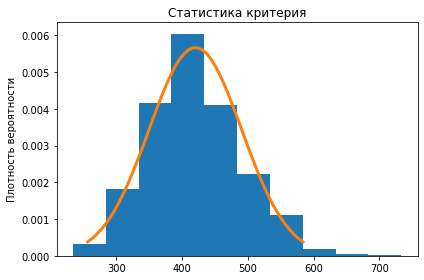

In [44]:

fig, ax = plt.subplots()

# гистограмма
n, bins, patches = ax.hist(df['A6'], 10, density=True)

# график
x = np.linspace(stats.norm.ppf(0.01, np.mean(df['A6']), np.std(df['A6'])), stats.norm.ppf(0.99, np.mean(df['A6']), np.std(df['A6'])))
ax.plot(x, stats.norm.pdf(x, np.mean(df['A6']), np.std(df['A6'])), lw=3, alpha=1)

ax.set_title("Статистика критерия")
ax.set_ylabel("Плотность вероятности")

fig.tight_layout()
plt.show()

In [45]:
stats.kstest(df['A6'],'norm',args = (np.mean(df['A6']),np.std(df['A6'])))

KstestResult(statistic=0.046919922824760096, pvalue=0.017182569671219172)

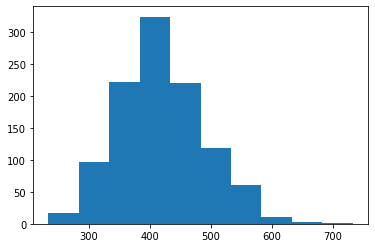

In [46]:

fig, ax = plt.subplots()

# гистограмма
n, bins, patches = ax.hist(df['A6'], 10)

In [47]:
prob = []
i = 0
while i < len(bins)-1:
    prob.append(len(df['A6'])*(stats.norm.cdf(bins[i+1], loc = np.mean(df['A6']), scale = np.std(df['A6'])) - stats.norm.cdf(bins[i], loc = np.mean(df['A6']), scale = np.std(df['A6']))))
    i += 1
f_exp = prob 
print(f_exp)

[24.06440501408228, 89.79037525214231, 206.64163972315907, 293.5579266075615, 257.52193338879545, 139.48264415160244, 46.616959684848624, 9.603689704185058, 1.2179246649997637, 0.09493474704502325]


In [48]:
def chisquare_test_norm(vib, n, bins): 
    sum0 = 0
    prob = []
    i = 0
    while i < len(bins)-1:
        prob.append(len(vib)*(stats.norm.cdf(bins[i+1], loc = np.mean(vib), scale = np.std(vib)) - stats.norm.cdf(bins[i], loc = np.mean(vib), scale = np.std(vib))))
        i += 1
    f_exp = prob 
    f_obs = n
    return stats.chisquare(f_obs, f_exp, ddof = 2)

In [49]:
chisquare_test_norm(df['A6'], n, bins)

Power_divergenceResult(statistic=30.520444859130983, pvalue=7.61972496410758e-05)

In [50]:
# 4.2. Проверка гипотезы о нормальности на основе коэффициента асимметрии и эксцесса (критерий Харке-Бера)

In [51]:
def Jarque_Bera_test(vib):
    k = stats.kurtosis(vib)
    s = stats.skew(vib)
    n = len(vib)
    criterion_v = n * ((s**2) / 6 + ((k - 3)**2)/24)
    return criterion_v

In [52]:
print("1. выбор-е зн-е: {} ".format(Jarque_Bera_test(df['A6'])))
print("1. p = {}".format(1 - stats.chi2.cdf(Jarque_Bera_test(df['A6']), 2)))

1. выбор-е зн-е: 378.2700124558215 
1. p = 0.0


In [53]:
# 5. Проверка однородности выборок

In [54]:
# 5.1 Критерий знаков

In [55]:
def sign_test(vib_X, vib_Y):
    quantity_plus = 0
    length_n = len(vib_X)
    for i in range (len(vib_X)):
        if ((vib_X[i] - vib_Y[i]) > 0):
            quantity_plus += 1
        if ((vib_X[i] - vib_Y[i]) == 0):
            length_n -= 1
    freq_plus = quantity_plus/length_n
    z_value = 2 * np.sqrt(length_n) * (freq_plus - 0.5)
    p_value = 2 * min(stats.norm.cdf(z_value, 0, 1), 1 - stats.norm.cdf(z_value, 0, 1))
    return z_value, p_value

In [56]:
sign_test(df['A6'], df['A7'])

(32.4970721987772, 0.0)

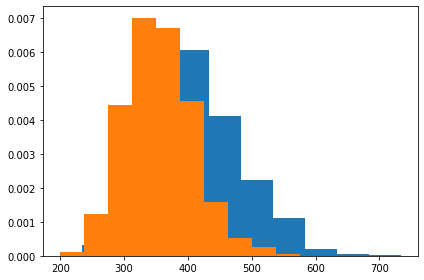

In [57]:
fig, ax = plt.subplots()

# гистограмма
n1, bins1, patches1 = ax.hist(df['A6'], 10, density=True)
n2, bins2, patches2 = ax.hist(df['A7'], 10, density=True)
fig.tight_layout()
plt.show()

In [58]:
# 5.2. Критерий хи-квадрат

In [59]:
def print_5_2(first , second):
    np_first = np.array(df[first])
    np_second = np.array(df[second])
    begin = min(min(np_first), min(np_second))
    end = max(max(np_first), max(np_second)) + 0.1
    n = len(np_first)
    k = int(1 + 1.3*np.log(len(np_first)))
    h =  (end - begin)/ k
    print(k,h)
    rows = []
    bins = []
    for i in range(1, k + 1):
        local_begin = begin + (i-1)*h
        bins.append(local_begin)
        local_end   = begin + i*h
        freq1 = freq(np_first, local_begin, local_end)
        freq2 = freq(np_second, local_begin, local_end)
        rows.append([i, round(local_begin, 4), round(local_end, 4), freq1, freq2, round(freq1/n, 4), round(freq2/n, 4)])
    bins.append(local_end)
    print(rows)
    return bins
bins = print_5_2('A6', 'A7')

10 53.410000000000004
[[1, 199.0, 252.41, 2, 18, 0.0019, 0.0168], [2, 252.41, 305.82, 43, 178, 0.0401, 0.1659], [3, 305.82, 359.23, 162, 411, 0.151, 0.383], [4, 359.23, 412.64, 306, 315, 0.2852, 0.2936], [5, 412.64, 466.05, 293, 119, 0.2731, 0.1109], [6, 466.05, 519.46, 168, 27, 0.1566, 0.0252], [7, 519.46, 572.87, 79, 4, 0.0736, 0.0037], [8, 572.87, 626.28, 15, 1, 0.014, 0.0009], [9, 626.28, 679.69, 4, 0, 0.0037, 0.0], [10, 679.69, 733.1, 1, 0, 0.0009, 0.0]]


In [60]:
freq = [[1, 199.0, 252.41, 2, 18, 0.0019, 0.0168], [2, 252.41, 305.82, 43, 178, 0.0401, 0.1659], [3, 305.82, 359.23, 162, 411, 0.151, 0.383], [4, 359.23, 412.64, 306, 315, 0.2852, 0.2936], [5, 412.64, 466.05, 293, 119, 0.2731, 0.1109], [6, 466.05, 519.46, 168, 27, 0.1566, 0.0252], [7, 519.46, 572.87, 79, 4, 0.0736, 0.0037], [8, 572.87, 626.28, 15, 1, 0.014, 0.0009], [9, 626.28, 679.69, 4, 0, 0.0037, 0.0], [10, 679.69, 733.1, 1, 0, 0.0009, 0.0]]

In [61]:
freq

[[1, 199.0, 252.41, 2, 18, 0.0019, 0.0168],
 [2, 252.41, 305.82, 43, 178, 0.0401, 0.1659],
 [3, 305.82, 359.23, 162, 411, 0.151, 0.383],
 [4, 359.23, 412.64, 306, 315, 0.2852, 0.2936],
 [5, 412.64, 466.05, 293, 119, 0.2731, 0.1109],
 [6, 466.05, 519.46, 168, 27, 0.1566, 0.0252],
 [7, 519.46, 572.87, 79, 4, 0.0736, 0.0037],
 [8, 572.87, 626.28, 15, 1, 0.014, 0.0009],
 [9, 626.28, 679.69, 4, 0, 0.0037, 0.0],
 [10, 679.69, 733.1, 1, 0, 0.0009, 0.0]]

In [62]:
f_1 = []
f_2 = []
for i in range(10):
    f_1.append(freq[i][3])
    f_2.append(freq[i][4])

In [63]:
f_1

[2, 43, 162, 306, 293, 168, 79, 15, 4, 1]

In [64]:
f_2

[18, 178, 411, 315, 119, 27, 4, 1, 0, 0]

In [65]:
stats.chisquare(f_2, f_1)

Power_divergenceResult(statistic=1245.7636794539005, pvalue=1.5961473086047256e-262)

In [66]:
def chisquare_2samp(freq_1, freq_2):
    length_vib = 0
    for i in range(len(freq_1)):
        length_vib += freq_1[i]
    criterion = 0
    for i in range(len(freq_1)):
        criterion +=  (((freq_1[i]/length_vib) - (freq_2[i]/length_vib))**2)/(freq_1[i]+freq_2[i])
    criterion = criterion*length_vib*length_vib  
    p_value = 1 - stats.chi2.cdf(criterion, len(freq_1)-1)
    return criterion, p_value

In [67]:
chisquare_2samp(f_1,f_2)

(464.0610539970998, 0.0)

In [68]:
# 6. Таблицы сопряжённости

In [69]:
def crosstab(first, second):
    x = df[first]
    x_labels = df.groupby(first).count().index
    y_labels = df.groupby(second).count().index
    
    rows =[]
    column_sum = [0 for i in range(len(y_labels)+1)] 
    for i in x_labels:
        row = [i]
        for j in range(len(y_labels)):
            count = x[(df[first] == i) & (df[second] == y_labels[j])].count()
            column_sum[j]+=count
            row.append(count)
        row_sum = sum(row[1:])
        row.append(row_sum)
        column_sum[j+1]+=row_sum
        rows.append(row)
    final_row =  ['$\sum$']
    final_row.extend(column_sum)
    rows.append(final_row)
    
    first_row = ['x \ y']
    first_row.extend(y_labels)
    first_row.append('$\sum$')
    
    print(first_row, rows) 
         
    
    for l in rows:
        l.pop(0)
    return np.array(rows)
    
ctab = crosstab('A14', 'A4')

['x \\ y', 'I', 'IIA', 'IIB', '$\\sum$'] [['N', 16, 173, 403, 592], ['Y', 164, 186, 131, 481], ['$\\sum$', 180, 359, 534, 1073]]


In [70]:
emp = [[16, 173, 403, 592],
       [164, 186, 131, 481],
       [180, 359, 534, 1073]
      ]

In [71]:
stats.chi2_contingency(emp)

(251.91962827126846,
 1.594693713225633e-51,
 6,
 array([[  99.31034483,  198.06896552,  294.62068966,  592.        ],
        [  80.68965517,  160.93103448,  239.37931034,  481.        ],
        [ 180.        ,  359.        ,  534.        , 1073.        ]]))

In [72]:
# 7. Дисперсионный анализ

In [73]:
def print_7_a(first, second):
    fetures = df.groupby(first).count().index
    rows = []
    for i in range(len(fetures)):
        n  = len(df[df[first] == fetures[i]])
        mean = round(df[df[first] == fetures[i]][second].mean(), 4)
        var = round(df[df[first] == fetures[i]][second].var(), 4)
        rows.append([i+1, fetures[i], n , mean, var])
    print(rows)
        
    rows = np.array(rows)
    return rows[:, 2:].astype(float)
data = print_7_a('A4', 'A6')

[[1, 'I', 180, 486.7556, 3266.1857], [2, 'IIA', 359, 439.1866, 3067.1578], [3, 'IIB', 534, 384.6835, 3811.8377]]


In [74]:
np.mean(df[df['A4'] =='IIB']['A6'])

384.6835205992509

In [75]:
D_X = np.var(df['A6'])
print("Все признаки:  Показатель вариации: {}, Число степеней свободы: {}, Несмещённая оценка: {}".format(D_X, len(df['A6']) - 1, D_X*(len(df['A6']))/(len(df['A6'])-1)))
D_W = (len(df[df['A4'] =='IIB']['A6'])*np.var(df[df['A4'] =='IIB']['A6']) + len(df[df['A4'] =='IIA']['A6'])*np.var(df[df['A4'] =='IIA']['A6']) + len(df[df['A4'] =='I']['A6'])*np.var(df[df['A4'] =='I']['A6']))/len(df['A6'])
k = 3 #Количество случайных величин 
print("Остаточные признаки:  Показатель вариации: {}, Число степеней свободы: {}, Несмещённая оценка: {}".format(D_W, len(df['A6']) - k, D_W*(len(df['A6']))/(len(df['A6'])-k)))
D_B = (len(df[df['A4'] =='IIB']['A6'])*np.power(np.mean(df[df['A4'] =='IIB']['A6'])-np.mean(df['A6']),2) + len(df[df['A4'] =='IIA']['A6'])*np.power(np.mean(df[df['A4'] =='IIA']['A6'])-np.mean(df['A6']),2) + len(df[df['A4'] =='I']['A6'])*np.power(np.mean(df[df['A4'] =='I']['A6'])-np.mean(df['A6']),2))/len(df['A6'])
print("Группировочный признак:  Показатель вариации: {}, Число степеней свободы: {}, Несмещённая оценка: {}".format(D_B, k - 1, D_B*(len(df['A6']))/(k - 1)))
print("Ню квадрат {}, Ню {}".format(D_B/D_X, np.power(D_B/D_X, 1/2)))

Все признаки:  Показатель вариации: 4953.143627929115, Число степеней свободы: 1072, Несмещённая оценка: 4957.764097731288
Остаточные признаки:  Показатель вариации: 3461.6954848531645, Число степеней свободы: 1070, Несмещённая оценка: 3471.401173128454
Группировочный признак:  Показатель вариации: 1491.448143075951, Число степеней свободы: 2, Несмещённая оценка: 800161.9287602478
Ню квадрат 0.30111142642142974, Ню 0.548736208411136


In [76]:
D_B+D_W

4953.143627929116

In [77]:
stats.f_oneway(df[df['A4'] =='IIB']['A6'], df[df['A4'] =='IIA']['A6'], df[df['A4'] =='I']['A6'])

F_onewayResult(statistic=230.5011402756243, pvalue=5.731231318175073e-84)

In [78]:
(D_B/(k-1))/((D_W)/(1073-k))

230.5011402756241

In [79]:
1 - stats.f.cdf((D_B/(k-1))/((D_W)/(1073-k)), 1073-3, 3-1)

0.004328958671009131

In [80]:
# 8. Корреляционный анализ

In [81]:
# 8.1. Расчёт парных коэффициентов корреляции

In [82]:
stats.pearsonr(df['A6'], df['A7'])

(0.9414076013458371, 0.0)

In [83]:
correl,_=stats.pearsonr(df['A6'], df['A7'])

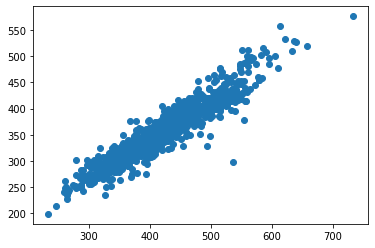

In [84]:
plt.scatter(df['A6'], df['A7'])

In [85]:
stats.spearmanr(df['A6'], df['A7'])

SpearmanrResult(correlation=0.9424893824769129, pvalue=0.0)

In [86]:
stats.kendalltau(df['A6'], df['A7'])

KendalltauResult(correlation=0.8019916322882887, pvalue=0.0)

In [87]:
def dov_interval_for_coef_pearson(alpha, vib1, vib2):
    correl, _ = stats.pearsonr(vib1, vib2)
    lower_bound = correl + (correl*(1-correl**2))/(2*len(vib1)) - stats.norm.ppf(1-alpha/2, loc=0, scale=1)*(1-correl**2)/np.power(len(vib1), 1/2)
    upper_bound = correl + (correl*(1-correl**2))/(2*len(vib1)) + stats.norm.ppf(1-alpha/2, loc=0, scale=1)*(1-correl**2)/np.power(len(vib1), 1/2)
    return lower_bound, upper_bound 

In [88]:
print(dov_interval_for_coef_pearson(0.01, df['A6'], df['A7']))
print(dov_interval_for_coef_pearson(0.05, df['A6'], df['A7']))
print(dov_interval_for_coef_pearson(0.1, df['A6'], df['A7']))

(0.9325126074884938, 0.9504023964534377)
(0.9346512780464994, 0.9482637258954322)
(0.9357455387939334, 0.9471694651479982)


In [89]:
def pearson(x, y):
    ro_pearson, _ = stats.pearsonr(x, y)
    z_crit = (ro_pearson * np.power(len(x) - 2, 1/2))/(np.power(1 - np.power(ro_pearson, 2), 1/2)) 
    p_value = 2*min(stats.t.cdf(z_crit, len(x) - 2), 1 - stats.t.cdf(z_crit, len(x) - 2))
    return ro_pearson, z_crit, p_value

def spirmen(x, y):
    ro_spirmen, _ = stats.spearmanr(x, y) 
    z_crit = (ro_spirmen * np.power(len(x) - 2, 1/2))/(np.power(1 - np.power(ro_spirmen, 2), 1/2)) 
    p_value = 2*min(stats.t.cdf(z_crit, len(x) - 2), 1 - stats.t.cdf(z_crit, len(x) - 2))
    return ro_spirmen, z_crit, p_value

def kendell(x, y):
    tao_kendell, _ = stats.kendalltau(x,y)
    z_crit =  np.power((9 * len(x) * (len(x) - 1))/(2 * (2 * len(x) + 5)), 1/2) * tao_kendell
    p_value = 2*min(stats.norm.cdf(z_crit, 0, 1), 1 - stats.norm.cdf(z_crit, 0, 1))
    return tao_kendell, z_crit, p_value

In [90]:
print(pearson(df['A6'], df['A7']))
print(spirmen(df['A6'], df['A7']))
print(kendell(df['A6'], df['A7']))

(0.9414076013458371, 91.34682028328257, 0.0)
(0.9424893824769129, 92.28218300833117, 0.0)
(0.8019916322882887, 39.34170181432877, 0.0)


In [91]:
# 8.2. Расчёт множественных коэффициентов корреляции

In [92]:
print(stats.kendalltau(df['A6'], df['A6']))
print(stats.kendalltau(df['A6'], df['A7']))
print(stats.kendalltau(df['A6'], df['A8']))
print(stats.kendalltau(df['A7'], df['A6']))
print(stats.kendalltau(df['A7'], df['A7']))
print(stats.kendalltau(df['A7'], df['A8']))
print(stats.kendalltau(df['A8'], df['A6']))
print(stats.kendalltau(df['A8'], df['A7']))
print(stats.kendalltau(df['A8'], df['A8']))

KendalltauResult(correlation=1.0, pvalue=0.0)
KendalltauResult(correlation=0.8019916322882887, pvalue=0.0)
KendalltauResult(correlation=0.8129554569730247, pvalue=0.0)
KendalltauResult(correlation=0.8019916322882887, pvalue=0.0)
KendalltauResult(correlation=0.9999999999999999, pvalue=0.0)
KendalltauResult(correlation=0.7868780458733714, pvalue=0.0)
KendalltauResult(correlation=0.8129554569730247, pvalue=0.0)
KendalltauResult(correlation=0.7868780458733714, pvalue=0.0)
KendalltauResult(correlation=1.0, pvalue=0.0)


In [93]:
# 9. Регрессионный анализ

In [94]:
# 9.1.1. Точечные оценки линейной регрессионной модели

In [95]:
X = df['A16']
Y = df['A11']
ro_pearson, _ = stats.pearsonr(X,Y)
beta_0 = np.mean(Y) - ro_pearson * (np.std(Y)/np.std(X)) * np.mean(X)
beta_1 = ro_pearson * (np.std(Y)/np.std(X))
print(beta_0)
print(beta_1)

491.7257722756832
0.4763277136914644


In [1]:
regr_func = beta_0 + beta_1 * X

k = 2

D_regr = 0
for i in range(len(X)):
    D_regr += (regr_func[i] - np.mean(Y))**2 
D_regr = D_regr/len(X)

D_res = 0
for i in range(len(X)):
    D_res += (Y[i] - regr_func[i])**2
D_res = D_res/len(X)

D_Y = 0
for i in range(len(X)):
    D_Y += (Y[i] - np.mean(Y))**2
D_Y = D_Y/len(X)

NameError: name 'beta_0' is not defined

In [97]:
print(D_regr)
print(D_res)
print(D_Y)

1876.9930642266947
7238.431095157811
9115.424159384516


In [98]:
print(D_regr*len(X)/(k-1))
print(D_res*len(X)/(len(X)-k))
print(D_Y*len(X)/(len(X)-1))

2014013.5579152436
7251.948240060066
9123.927353563045


In [99]:
D_res+D_regr

9115.424159384505

In [100]:
coef_det = D_regr/D_Y
correl_ratio = np.power(coef_det, 1/2)
print(coef_det)
print(correl_ratio)

0.20591395764006132
0.4537774318320175


In [101]:
# 9.1.2. Интервальные оценки линейной регрессионной модели

In [102]:
def dov_interval_beta_0(alpha, X, Y):
    ro_pearson, _ = stats.pearsonr(X,Y)
    beta_0 = np.mean(Y) - ro_pearson * (np.std(Y)/np.std(X)) * np.mean(X)
    D_res = 0
    for i in range(len(X)):
        D_res += (Y[i] - regr_func[i])**2
    D_res = D_res/len(X)
    x = 0
    for i in range(len(X)):
        x += X[i]**2
    lower_bound = beta_0 - stats.t.ppf(1-alpha/2, len(X)-2) * np.power(D_res, 1/2) * np.power(x/((len(X)**2)*np.var(X)), 1/2)
    upper_bound = beta_0 + stats.t.ppf(1-alpha/2, len(X)-2) * np.power(D_res, 1/2) * np.power(x/((len(X)**2)*np.var(X)), 1/2)
    return lower_bound, upper_bound 

In [103]:
print(dov_interval_beta_0(0.01, X, Y))
print(dov_interval_beta_0(0.05, X, Y))
print(dov_interval_beta_0(0.1, X, Y))

(482.9126466678909, 500.5388978834755)
(485.02418862622176, 498.42735592514464)
(486.1031183870578, 497.3484261643086)


In [104]:
def dov_interval_beta_1(alpha, X, Y):
    ro_pearson, _ = stats.pearsonr(X,Y)
    beta_1 = ro_pearson * (np.std(Y)/np.std(X))
    D_res = 0
    for i in range(len(X)):
        D_res += (Y[i] - regr_func[i])**2
    D_res = D_res/len(X)
    lower_bound = beta_1 - stats.t.ppf(1-alpha/2, len(X)-2) * np.power(D_res, 1/2) * np.power(1/((len(X))*np.var(X)), 1/2)
    upper_bound = beta_1 + stats.t.ppf(1-alpha/2, len(X)-2) * np.power(D_res, 1/2) * np.power(1/((len(X))*np.var(X)), 1/2)
    return lower_bound, upper_bound 

In [105]:
print(dov_interval_beta_1(0.01, X, Y))
print(dov_interval_beta_1(0.05, X, Y))
print(dov_interval_beta_1(0.1, X, Y))

(0.4026411063770828, 0.5500143210058461)
(0.4202957240502719, 0.532359703332657)
(0.42931666362887433, 0.5233387637540545)


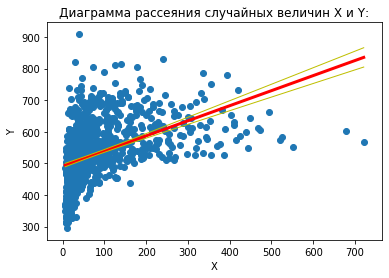

In [106]:
x_linspace = np.linspace(min(X),max(X), len(X))
regr_func = beta_0 + beta_1 * x_linspace
fig, ax = plt.subplots()
ax.set_title('Диаграмма рассеяния случайных величин X и Y:')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.plot(x_linspace, regr_func, lw=3, color='r', alpha=1)
lower_bound = regr_func - stats.t.ppf(1-0.1/2, len(X)-2) * np.power(D_res, 1/2) * np.power((1/len(X))+((x_linspace-np.mean(X))**2)/(len(X)*np.var(X)), 1/2)
ax.plot(x_linspace, lower_bound, lw=1, color='y', alpha=1)
upper_bound = regr_func + stats.t.ppf(1-0.1/2, len(X)-2) * np.power(D_res, 1/2) * np.power((1/len(X))+((x_linspace-np.mean(X))**2)/(len(X)*np.var(X)), 1/2)
ax.plot(x_linspace, upper_bound, lw=1, color='y', alpha=1)
plt.scatter(X, Y)

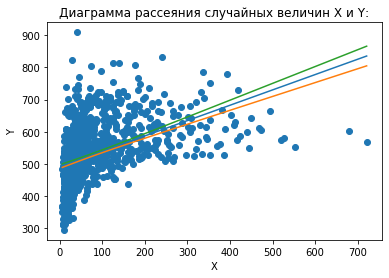

In [107]:
reg_func = lambda x: beta_0 + beta_1*x
fig, ax = plt.subplots()

x_linspace = np.linspace(min(X), max(X), 100)
y_values = [
    reg_func(a) for a in x_linspace
]
y_values_min = [
    reg_func(a)-stats.t(len(X)-2).ppf(1-0.1/2)*np.sqrt(D_res)*np.sqrt(1/len(X) + (a-np.mean(X))**2/(len(X)*np.var(X))) for a in x_linspace
]
y_values_max = [
    reg_func(a)+stats.t(len(X)-2).ppf(1-0.1/2)*np.sqrt(D_res)*np.sqrt(1/len(X) + (a-np.mean(X))**2/(len(X)*np.var(X))) for a in x_linspace
]


ax.set_title('Диаграмма рассеяния случайных величин X и Y:')
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax.scatter(X, Y)
ax.plot(x_linspace, y_values, label='f(x)')
ax.plot(x_linspace, y_values_min, label='f_min(x)')
ax.plot(x_linspace, y_values_max, label='f_max(x)')

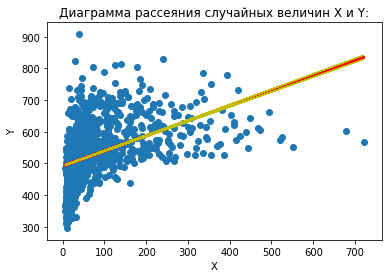

In [135]:
regr_func = beta_0 + beta_1 * X
fig, ax = plt.subplots()
ax.set_title('Диаграмма рассеяния случайных величин X и Y:')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.plot(X, regr_func, lw=3, color='r', alpha=1)
lower_bound = regr_func - stats.t.ppf(1-0.1/2, len(X)-2) * np.power(D_res, 1/2) * np.power((1/len(X))+((X-np.mean(X))**2)/(len(X)*np.var(X)), 1/2)
ax.plot(X, lower_bound, lw=1, color='y', alpha=1)
upper_bound = regr_func + stats.t.ppf(1-0.1/2, len(X)-2) * np.power(D_res, 1/2) * np.power((1/len(X))+((X-np.mean(X))**2)/(len(X)*np.var(X)), 1/2)
ax.plot(X, upper_bound, lw=1, color='y', alpha=1)
plt.scatter(X, Y)

Text(0, 0.5, 'e')

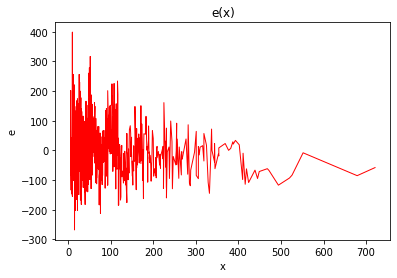

In [136]:
fig, ax = plt.subplots()
ax.plot(sorted(X), Y - regr_func, lw=1, color='r', alpha=1)
ax.set_title('e(x)')
ax.set_xlabel('x')
ax.set_ylabel('e')

In [2]:
def significance_of_linear_regression_model(regr_func, X, Y):
    D_regr = 0
    for i in range(len(X)):
        D_regr += (regr_func[i] - np.mean(Y))**2 
    D_regr = D_regr/len(X)
    D_Y = 0
    for i in range(len(X)):
        D_Y += (Y[i] - np.mean(Y))**2
    D_Y = D_Y/len(X)
    coef_det = D_regr/D_Y
    criterion = coef_det/(1 - coef_det)*(len(X) - 2)
    p_value = 1 - stats.f.cdf(criterion, 1, len(X) - 2)
    return criterion, p_value

In [3]:
significance_of_linear_regression_model(regr_func, X, Y)

NameError: name 'regr_func' is not defined

In [139]:
# 9.2 Линейная регрессионная модель общего вида

In [140]:
X = df['A16']
Y = df['A11']

In [141]:
import numpy as np
a0 = np.ones((len(X), 1))
a1 = np.expand_dims(X ,axis=0)
a2 = np.expand_dims(X**2 ,axis=0)
A = np.concatenate((a0, a1.T, a2.T), axis=1)
Y1 = np.expand_dims(Y, axis=0).T
beta = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), Y1)
beta
b0 = beta[0, 0]
b1 = beta[1, 0]
b2 = beta[2, 0]
b0 , b1, b2

print ("b0:",b0," | b1:",b1," | b2:",b2)
reg_func = lambda x: b0 + b1*x + b2*x**2

b0: 462.6002575659367  | b1: 1.1920234862114878  | b2: -0.001849722232005753


In [142]:
regr_func = 462.6002575659367 + 1.1920234862114878*X -0.001849722232005753*(X**2)
k = 3

D_regr = 0
for i in range(len(X)):
    D_regr += (regr_func[i] - np.mean(Y))**2 
D_regr = D_regr/len(X)

D_res = 0
for i in range(len(X)):
    D_res += (Y[i] - regr_func[i])**2
D_res = D_res/len(X)

D_Y = 0
for i in range(len(X)):
    D_Y += (Y[i] - np.mean(Y))**2
D_Y = D_Y/len(X)

In [143]:
print(D_regr)
print(D_res)
print(D_Y)

2777.705255821771
6337.718903562682
9115.424159384516


In [144]:
print(D_regr*len(X)/(k-1))
print(D_res*len(X)/(len(X)-k))
print(D_Y*len(X)/(len(X)-1))

1490238.8697483803
6355.488208899773
9123.927353563045


In [145]:
D_res+D_regr

9115.424159384453

In [146]:
coef_det = D_regr/D_Y
correl_ratio = np.power(coef_det, 1/2)
print(coef_det)
print(correl_ratio)

0.3047258369169872
0.5520197794617392


In [147]:
x_linspace = np.linspace(min(X),max(X), len(X))
regr_func = 462.6002575659367 + 1.1920234862114878*x_linspace -0.001849722232005753*(x_linspace**2)

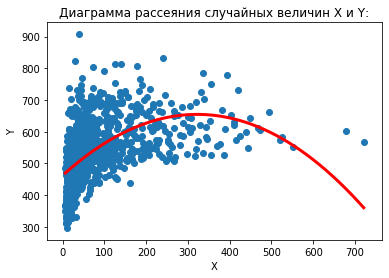

In [148]:
fig, ax = plt.subplots()
ax.set_title('Диаграмма рассеяния случайных величин X и Y:')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.plot(x_linspace, regr_func, lw=3, color='r', alpha=1)
plt.scatter(X, Y)

In [149]:
f0 = lambda x : 1
f1 = lambda x : x
f2 = lambda x : x**2

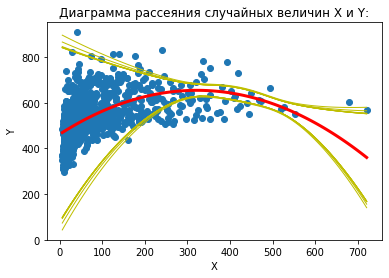

In [150]:
# б), в)

f_row = lambda x : np.array([f0(x), f1(x), f2(x)]) 
f_column = lambda x : (f_row(x)).transpose()  

F = [
    f_row(val) for val in x
]

F = np.array(F)

fig, ax = plt.subplots()

x_linspace = np.linspace(min(X), max(X), 100)
y_values = [
    reg_func(a) for a in x_linspace
]
y_values_min = [
    reg_func(a)-stats.t(n-k).ppf(1-0.1/2)*np.sqrt(D_res)*np.sqrt(np.dot(np.dot(f_row(a),np.linalg.inv(np.dot(F.transpose(),F))),f_column(a))) for a in x_linspace
]
y_values_max = [
    reg_func(a)+stats.t(n-k).ppf(1-0.1/2)*np.sqrt(D_res)*np.sqrt(np.dot(np.dot(f_row(a),np.linalg.inv(np.dot(F.transpose(),F))),f_column(a))) for a in x_linspace
]


ax.set_title('Диаграмма рассеяния случайных величин X и Y:')
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax.scatter(X, Y)
ax.plot(x_linspace, y_values, color='r', lw=3, label='f(x)')
ax.plot(x_linspace, y_values_min, color='y', lw=1, label='f_min(x)')
ax.plot(x_linspace, y_values_max, color='y', lw=1, label='f_max(x)')



Text(0, 0.5, 'e')

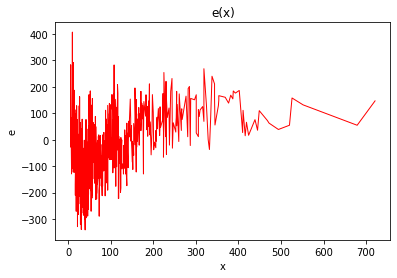

In [151]:
#regr_func = 462.6002575659367 + 1.1920234862114878*X -0.001849722232005753*(X**2)
fig, ax = plt.subplots()
ax.plot(sorted(X), Y - regr_func, lw=1, color='r', alpha=1)
ax.set_title('e(x)')
ax.set_xlabel('x')
ax.set_ylabel('e')

In [152]:
def significance_of_linear_regression_model_2(regr_func, X, Y):
    D_regr = 0
    for i in range(len(X)):
        D_regr += (regr_func[i] - np.mean(Y))**2 
    D_regr = D_regr/len(X)
    D_Y = 0
    for i in range(len(X)):
        D_Y += (Y[i] - np.mean(Y))**2
    D_Y = D_Y/len(X)
    coef_det = D_regr/D_Y
    criterion = (coef_det/(3-1))/((1 - coef_det)/(len(X) - 3))
    p_value = 1 - stats.f.cdf(criterion, 3 - 1, len(X) - 3)
    return criterion, p_value

In [153]:
significance_of_linear_regression_model_2(regr_func, X, Y)

(3485.2443900056483, 1.1102230246251565e-16)

In [154]:
# 9.3 Множественная линейная регрессионная модель

In [155]:
X1 = np.array(df['A16']) #фактор1 (заполнить своим)
X2 = np.array(df['A6']) #фактор1 (заполнить своим)
Y = np.array(df['A11'])  #результирующий признак (заполнить своим)

In [156]:
f0 = lambda x1, x2 : 1
f1 = lambda x1, x2 : x1
f2 = lambda x1, x2 : x2

y_column =  np.array(Y).transpose()

F = [
    np.array([f0(X[i], X2[i]), f1(X1[i], X2[i]), f2(X1[i], X2[i])]) for i in range(len(Y))
]

F = np.array(F)

b = np.dot(np.dot(np.linalg.inv(np.dot(F.transpose(), F)), F.transpose()), y_column)

b0 = b[0]
b1 = b[1]
b2 = b[2]


print ("b0:",b0," | b1:",b1," | b2:",b2)


reg_func = lambda x1, x2: b0 + b1*x1 + b2*x2

b0: -34.010052532796976  | b1: -0.01898226968199737  | b2: 1.3432105097434315


In [157]:
regr_func = -34.010052532796976 - 0.01898226968199737*X1 + 1.3432105097434315*X2
k = 3

D_regr = 0
for i in range(len(X)):
    D_regr += (regr_func[i] - np.mean(Y))**2 
D_regr = D_regr/len(X)

D_res = 0
for i in range(len(X)):
    D_res += (Y[i] - regr_func[i])**2
D_res = D_res/len(X)

D_Y = 0
for i in range(len(X)):
    D_Y += (Y[i] - np.mean(Y))**2
D_Y = D_Y/len(X)

In [158]:
print(D_regr)
print(D_res)
print(D_Y)

8783.951366884026
331.47279250055146
9115.424159384516


In [159]:
print(D_regr*len(X)/(k-1))
print(D_res*len(X)/(len(X)-k))
print(D_Y*len(X)/(len(X)-1))

4712589.90833328
332.4021554701792
9123.927353563045


In [160]:
D_res+D_regr

9115.424159384578

In [161]:
coef_det = D_regr/D_Y
correl_ratio = np.power(coef_det, 1/2)
print(coef_det)
print(correl_ratio)

0.963636053934009
0.9816496594681877
